# NN for fashion MNIST

In [22]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
(X_train_fashion, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train_fashion / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28* 28)
X_test = X_test.reshape(-1, 28* 28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
print(np.shape(y_test))
print(X_train.shape)
print(y_train[0])  


(10000, 10)
(60000, 784)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
import tensorflow as tf
import datetime

log_dir = "logs/gradient_logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(256, activation = 'relu', input_shape=(784,)))

for i in range(100):
    model.add(Dense(128,activation='relu'))
    i+=1

model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics ='accuracy')
              
history = model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/20
375/375 [==============================] - 36s 53ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 2/20
375/375 [==============================] - 19s 50ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/20
375/375 [==============================] - 22s 58ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 4/20
375/375 [==============================] - 19s 52ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/20
375/375 [==============================] - 21s 56ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 6/20
375/375 [==============================] - 19s 51ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/20
375/375 [==============================] - 21s 55ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy:

In [26]:
test_accuracy, test_loss = model.evaluate(X_test, y_test)
print("accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1000
accuracy: 2.302607297897339


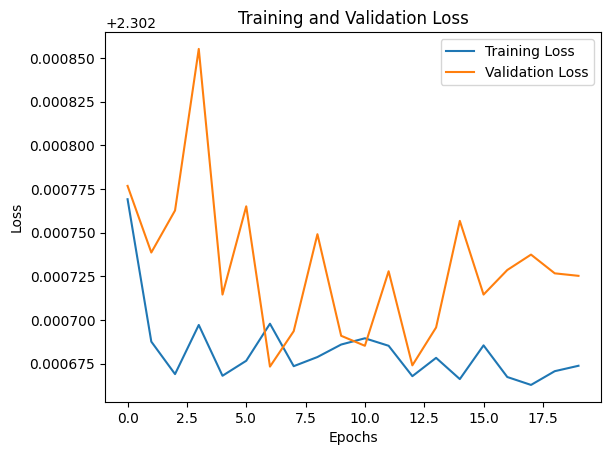

In [27]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model_elu = Sequential()

model_elu.add(Dense(256, activation = 'elu', input_shape=(784,)))

for i in range(100):
    model_elu.add(Dense(128,activation='elu'))
    i+=1

model_elu.add(Dense(10, activation = 'softmax'))

model_elu.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics ='accuracy')
              
history_elu = model_elu.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/20
375/375 [==============================] - 24s 49ms/step - loss: 1.9020 - accuracy: 0.1894 - val_loss: 1.7056 - val_accuracy: 0.1981
Epoch 2/20
375/375 [==============================] - 17s 46ms/step - loss: 1.8779 - accuracy: 0.1881 - val_loss: 1.7554 - val_accuracy: 0.1933
Epoch 3/20
375/375 [==============================] - 17s 46ms/step - loss: 2.0718 - accuracy: 0.1475 - val_loss: 1.8296 - val_accuracy: 0.1984
Epoch 4/20
375/375 [==============================] - 17s 45ms/step - loss: 1.7474 - accuracy: 0.1954 - val_loss: 1.7305 - val_accuracy: 0.1989
Epoch 5/20
375/375 [==============================] - 18s 48ms/step - loss: 1.7368 - accuracy: 0.1997 - val_loss: 1.7030 - val_accuracy: 0.2010
Epoch 6/20
375/375 [==============================] - 17s 46ms/step - loss: 2.0210 - accuracy: 0.1595 - val_loss: 1.9600 - val_accuracy: 0.1912
Epoch 7/20
375/375 [==============================] - 18s 47ms/step - loss: 1.7428 - accuracy: 0.1960 - val_loss: 1.7069 - val_accuracy:

313/313 [==============================] - 4s 12ms/step - loss: 2.3031 - accuracy: 0.1001
accuracy: 2.303147315979004


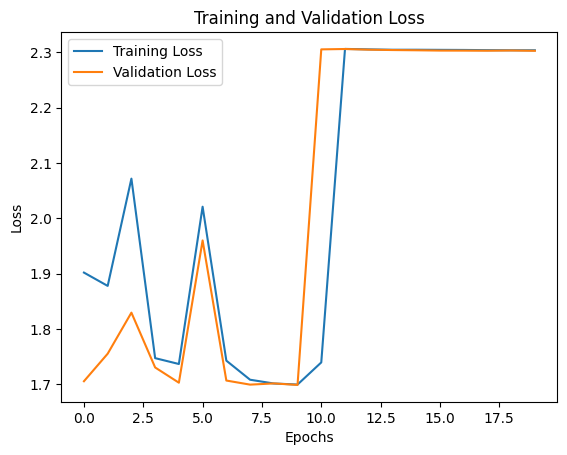

In [29]:
test_accuracy, test_loss = model_elu.evaluate(X_test, y_test)
print("accuracy:", test_accuracy)

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_elu.history['loss'], label='Training Loss')
plt.plot(history_elu.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_selu = Sequential()

model_selu.add(Dense(256, activation = 'selu', input_shape=(784,)))

for i in range(100):
    model_selu.add(Dense(128,activation='selu'))
    i+=1

model_selu.add(Dense(10, activation = 'softmax'))

model_selu.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics ='accuracy')
              
history_selu = model_selu.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/20
375/375 [==============================] - 41s 62ms/step - loss: 2.3769 - accuracy: 0.0989 - val_loss: 2.3383 - val_accuracy: 0.0995
Epoch 2/20
375/375 [==============================] - 22s 60ms/step - loss: 2.3298 - accuracy: 0.0988 - val_loss: 2.3272 - val_accuracy: 0.0983
Epoch 3/20
375/375 [==============================] - 25s 66ms/step - loss: 2.3274 - accuracy: 0.0990 - val_loss: 2.3344 - val_accuracy: 0.0983
Epoch 4/20
375/375 [==============================] - 24s 64ms/step - loss: 2.3268 - accuracy: 0.1000 - val_loss: 2.3176 - val_accuracy: 0.0983
Epoch 5/20
375/375 [==============================] - 25s 66ms/step - loss: 2.3237 - accuracy: 0.1037 - val_loss: 2.3614 - val_accuracy: 0.0983
Epoch 6/20
375/375 [==============================] - 23s 62ms/step - loss: 2.3542 - accuracy: 0.0996 - val_loss: 2.3211 - val_accuracy: 0.1003
Epoch 7/20
375/375 [==============================] - 25s 66ms/step - loss: 2.3231 - accuracy: 0.0974 - val_loss: 2.3411 - val_accuracy:

313/313 [==============================] - 3s 8ms/step - loss: 2.3160 - accuracy: 0.1000
accuracy: 2.3160476684570312


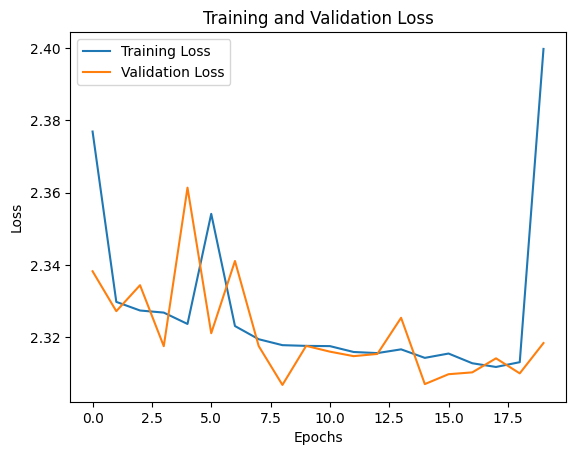

In [31]:
test_accuracy, test_loss = model_selu.evaluate(X_test, y_test)
print("accuracy:", test_accuracy)

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_selu.history['loss'], label='Training Loss')
plt.plot(history_selu.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sigmo = Sequential()

model_sigmo.add(Dense(256, activation = 'sigmoid', input_shape=(784,)))

for i in range(100):
    model_sigmo.add(Dense(128,activation='sigmoid'))
    i+=1

model_sigmo.add(Dense(10, activation = 'softmax'))

model_sigmo.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics ='accuracy')
              
history_sigmo = model_sigmo.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/20
375/375 [==============================] - 35s 57ms/step - loss: 2.3104 - accuracy: 0.0976 - val_loss: 2.3104 - val_accuracy: 0.0983
Epoch 2/20
375/375 [==============================] - 21s 55ms/step - loss: 2.3083 - accuracy: 0.0982 - val_loss: 2.3047 - val_accuracy: 0.0995
Epoch 3/20
375/375 [==============================] - 21s 55ms/step - loss: 2.3072 - accuracy: 0.0978 - val_loss: 2.3066 - val_accuracy: 0.1003
Epoch 4/20
375/375 [==============================] - 21s 55ms/step - loss: 2.3072 - accuracy: 0.0976 - val_loss: 2.3096 - val_accuracy: 0.0995
Epoch 5/20
375/375 [==============================] - 20s 55ms/step - loss: 2.3071 - accuracy: 0.0990 - val_loss: 2.3083 - val_accuracy: 0.0995
Epoch 6/20
375/375 [==============================] - 20s 53ms/step - loss: 2.3065 - accuracy: 0.1019 - val_loss: 2.3067 - val_accuracy: 0.1005
Epoch 7/20
375/375 [==============================] - 21s 56ms/step - loss: 2.3069 - accuracy: 0.0999 - val_loss: 2.3081 - val_accuracy:

313/313 [==============================] - 2s 8ms/step - loss: 2.3026 - accuracy: 0.1000
accuracy: 2.302598714828491


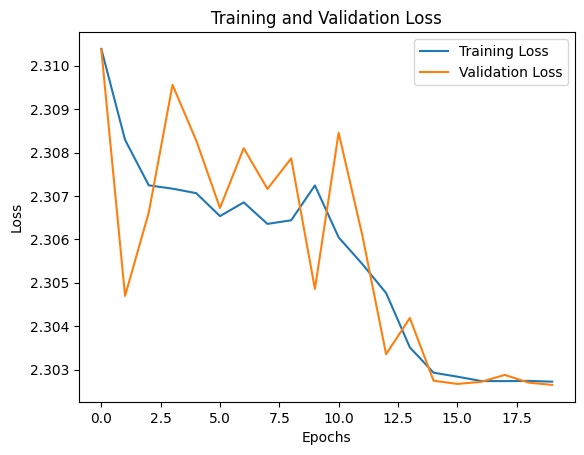

In [33]:
test_accuracy, test_loss = model_sigmo.evaluate(X_test, y_test)
print("accuracy:", test_accuracy)

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history_sigmo.history['loss'], label='Training Loss')
plt.plot(history_sigmo.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [34]:
#tensorboard --logdir=logs/gradient_logs
# in terminal for curve ab vanishing / exploding gradient